In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [38]:
csv_files = ["/home/digvijay/Documents/developer/greedy_kernel_alignment/checkerboard_hinge_effcientsu2_greedy.csv",
"/home/digvijay/Documents/developer/greedy_kernel_alignment/checkerboard_hinge_effcientsu2_random.csv",
"/home/digvijay/Documents/developer/greedy_kernel_alignment/checkerboard_kta_effcientsu2_greedy.csv",
"/home/digvijay/Documents/developer/greedy_kernel_alignment/checkerboard_kta_effcientsu2_random.csv",
"/home/digvijay/Documents/developer/greedy_kernel_alignment/linear_hinge_effcientsu2_random.csv"]


In [39]:
npy_files = ["/home/digvijay/Documents/developer/greedy_kernel_alignment/checkerboard_hinge_effcientsu2_greedy.npy",
"/home/digvijay/Documents/developer/greedy_kernel_alignment/checkerboard_hinge_effcientsu2_random.npy",
"/home/digvijay/Documents/developer/greedy_kernel_alignment/checkerboard_kta_effcientsu2_greedy.npy",
"/home/digvijay/Documents/developer/greedy_kernel_alignment/checkerboard_kta_effcientsu2_random.npy",
"/home/digvijay/Documents/developer/greedy_kernel_alignment/linear_hinge_effcientsu2_random.npy"]

In [40]:
df = []
npf = []
for f in range(5):
    tmp = pd.read_csv(csv_files[f])
    tmp['algorithm'] = csv_files[f][59:]
    df.append(tmp)
    npf.append(np.load(npy_files[f], allow_pickle=True).item())

In [41]:
dff = pd.concat(df)

In [42]:
dff

,Unnamed: 0,initial_accuracy,initial_accuracy_classical,trained_training_accuracy,trained_testing_accuracy,initial_auc,initial_auc_classical,auc_trained,circuit_executions,algorithm
0,0,0.458333,0.208333,0.333333,0.500000,0.451049,0.213287,0.475524,118542,checkerboard_hinge_effcientsu2_greedy.csv
0,0,0.458333,0.208333,0.222222,0.541667,0.451049,0.213287,0.548951,370542,checkerboard_hinge_effcientsu2_random.csv
0,0,0.458333,0.208333,0.555556,0.666667,0.451049,0.213287,0.664336,75542,checkerboard_kta_effcientsu2_greedy.csv
0,0,0.458333,0.208333,0.500000,0.458333,0.451049,0.213287,0.500000,215542,checkerboard_kta_effcientsu2_random.csv
0,0,0.500000,0.968750,0.364583,0.500000,0.501961,0.966667,0.498039,135952,linear_hinge_effcientsu2_random.csv


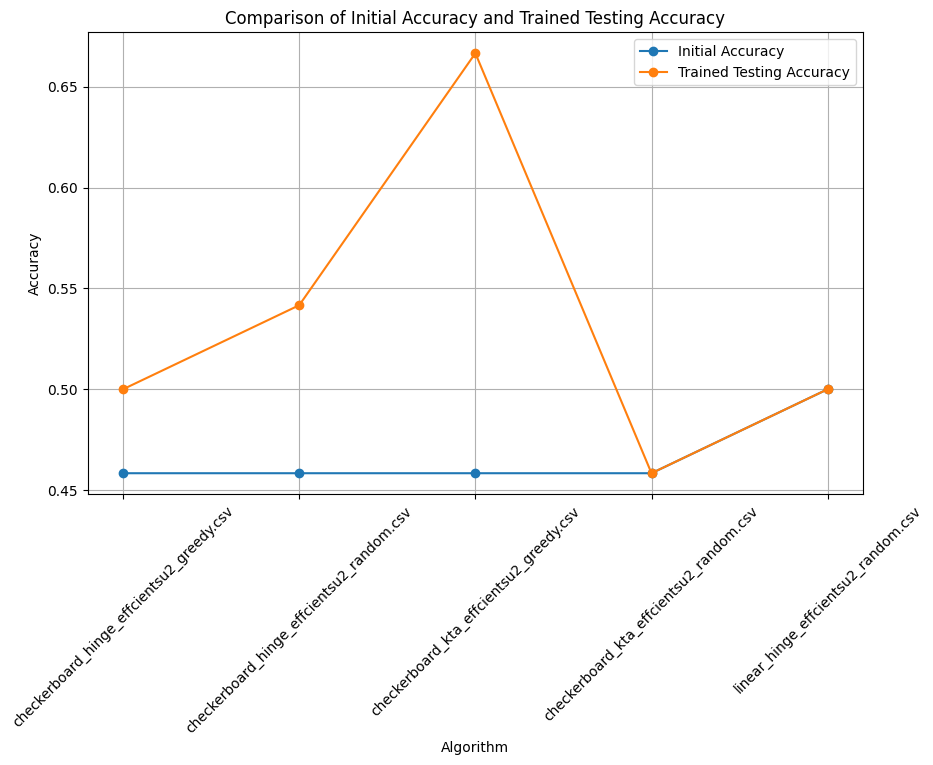

In [43]:
fig, ax = plt.subplots(figsize=(10, 6))

# Plot for initial_accuracy vs. trained_testing_accuracy
ax.plot(dff['algorithm'], dff['initial_accuracy'], label='Initial Accuracy', marker='o')
ax.plot(dff['algorithm'], dff['trained_testing_accuracy'], label='Trained Testing Accuracy', marker='o')

# Adding labels and title
ax.set_xlabel('Algorithm')
ax.set_ylabel('Accuracy')
ax.set_title('Comparison of Initial Accuracy and Trained Testing Accuracy')
ax.legend()
ax.grid(True)
plt.xticks(rotation=45)

plt.show()

In [53]:
alignments = []
lcost = []
for n in npf:
    alignments.append(n['alignment'][0])
    lcost.append(n['lcost'][0])

In [54]:
print(alignments)

[[tensor(0.04565643, requires_grad=True), tensor(0.0410256, requires_grad=True), tensor(0.04608736, requires_grad=True), tensor(0.04772503, requires_grad=True), tensor(0.03784969, requires_grad=True), tensor(0.02915859, requires_grad=True), tensor(0.02621286, requires_grad=True), tensor(0.02582116, requires_grad=True), tensor(0.02807026, requires_grad=True), tensor(0.03507879, requires_grad=True), tensor(0.04868684, requires_grad=True), tensor(0.05645032, requires_grad=True), tensor(0.06252698, requires_grad=True), tensor(0.07144258, requires_grad=True), tensor(0.07279541, requires_grad=True), tensor(0.06016968, requires_grad=True), tensor(0.04631484, requires_grad=True), tensor(0.03036879, requires_grad=True), tensor(0.03084303, requires_grad=True), tensor(0.03054947, requires_grad=True), tensor(0.04693583, requires_grad=True), tensor(0.04520965, requires_grad=True), tensor(0.04047437, requires_grad=True), tensor(0.05357917, requires_grad=True), tensor(0.06507523, requires_grad=True),

ValueError: x and y must have same first dimension, but have shapes (101,) and (21,)

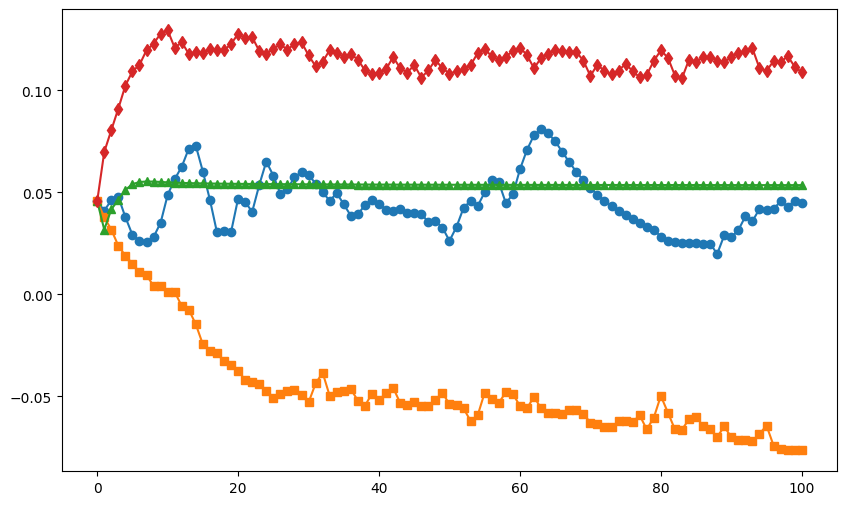

In [55]:
x = range(101)
plt.figure(figsize=(10, 6))
plt.plot(x, alignments[0], label='checkerboard_hinge_effcientsu2_greedy', marker='o')
plt.plot(x, alignments[1], label='checkerboard_hinge_effcientsu2_random', marker='s')
plt.plot(x, alignments[2], label='checkerboard_kta_effcientsu2_greedy', marker='^')
plt.plot(x, alignments[3], label='checkerboard_kta_effcientsu2_random', marker='d')


# Adding labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Alignments')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
x = range(21)
plt.figure(figsize=(10, 6))
plt.plot(x, alignments[4], label='linear_hinge_effcientsu2_random', marker='d')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Alignments Linear')
plt.legend()
plt.grid(True)
plt.show()